In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
%matplotlib inline

## 10.1 1d Self-Organizing Map for 2d data

In [2]:
data = np.hstack((np.random.uniform(0, 1, (1000,1)), np.random.uniform(0, 2, (1000,1))))

In [3]:
data[0]

array([ 0.8747182 ,  0.30935905])

In [41]:
def make_prototypes(data, K, dim=2):
    data_mean = np.mean(data, axis=0)

    pca = PCA()
    pcs = pca.fit_transform(data)
    
    prototypes = np.zeros((K, dim))
    for k in range(K):
        for i in range(dim):
            weighted_pcs = (np.random.rand(data.shape[1])-0.5) * pcs[i]
        prototypes[k] = data_mean + weighted_pcs
        
    return prototypes

In [42]:
ps = make_prototypes(data, 4)
ps.shape

(4, 2)

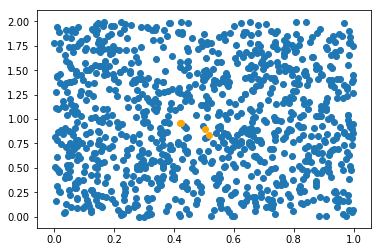

In [43]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(ps[:, 0], ps[:, 1], color='orange')

In [70]:
def h_qp(q, p, sigma):
    return np.exp(-np.square(q-p)/(2*np.square(sigma)))

def kohonen_map(data, M, eps, sigma, dim=2):
    if dim == 2:
        ws = make_prototypes(data, M, dim)
    elif dim == 3:
        ws = np.hstack((np.zeros(M), np.zeros(M), np.linspace(0, 5, M)))
    j = 0
    while True:
        ws_old = ws.copy()
        # Chose a data point
        i = np.random.choice(range(data.shape[0]))
        x = data[i]

        print("data", data.shape)
        print("ws", ws.shape)
        # Determine the closest prototype
        dists = cdist(data[i, np.newaxis], ws).T
        i_q = np.argmin(dists)

        # Change Prototypes
        for k in range(ws.shape[0]):
            ws[k] += eps * h_qp(ws[k], ws[i_q], sigma) * (x - ws[k])

        if np.max(np.abs(ws - ws_old)) < 0.01:
            print("Breaking after iteration {}".format(j))
            break
        else:
            j += 1
            sigma = 0.9*sigma
            #eps = 0.9*eps
    return ws

In [64]:
ps = kohonen_map(data, 4, 0.1, 5)

Breaking after iteration 73


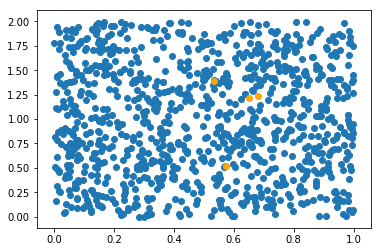

In [65]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.scatter(ps[:, 0], ps[:, 1], color='orange')
plt.show()

Breaking after iteration 235


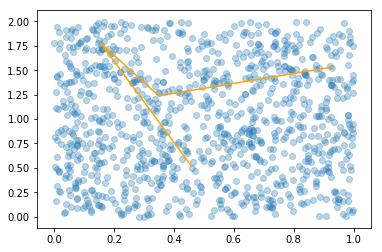

Breaking after iteration 47


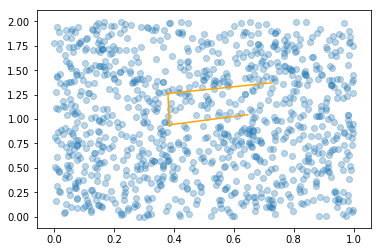

Breaking after iteration 77


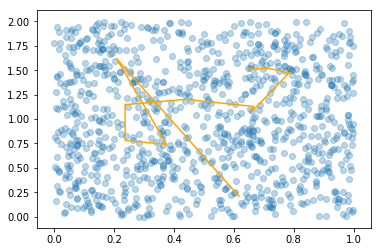

Breaking after iteration 53


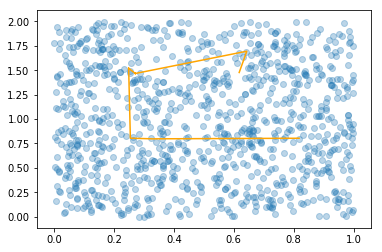

Breaking after iteration 49


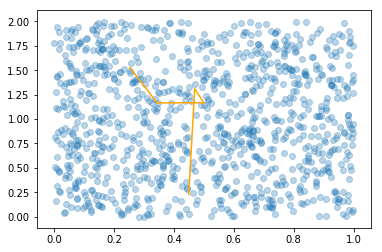

Breaking after iteration 56


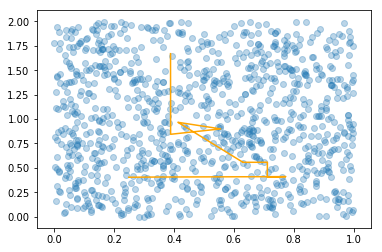

In [66]:
for k in [4, 8, 16, 32, 64, 128]:
    ps = kohonen_map(data, k, 0.3, 5)
    plt.figure()
    plt.scatter(data[:,0], data[:,1], alpha=0.3)
    plt.plot(ps[:, 0], ps[:, 1], color='orange')
    plt.show()

## 10.2 1d Self-Organizing Maps for 3d data

In [67]:
spiral = np.genfromtxt('spiral.csv', delimiter=',', skip_header=1)[:,1:]

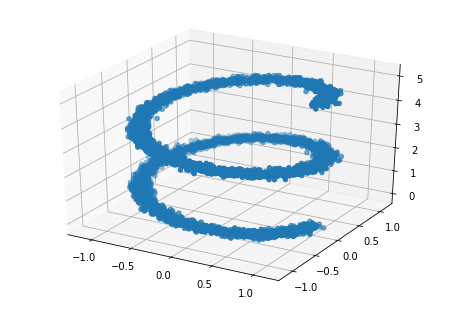

In [68]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(spiral[:,0], spiral[:, 1], spiral[:,2])
plt.show()

In [71]:
ps = kohonen_map(spiral, 4, 0.1, 5, dim=3)

(5000, 3)
(12,)


ValueError: XB must be a 2-dimensional array.

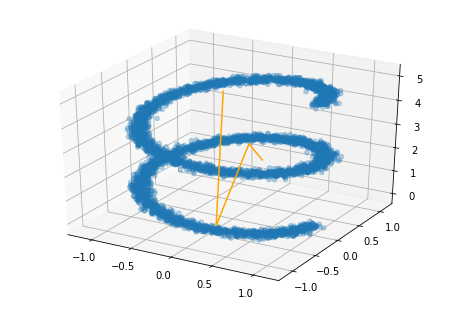

In [62]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(spiral[:,0], spiral[:, 1], spiral[:,2], alpha=0.3)
ax.plot(ps[:,0], ps[:, 1], ps[:,2], color='orange')
plt.show()